### 36 - Capstone Project!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read scrape file
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
#task explore the dataframe
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

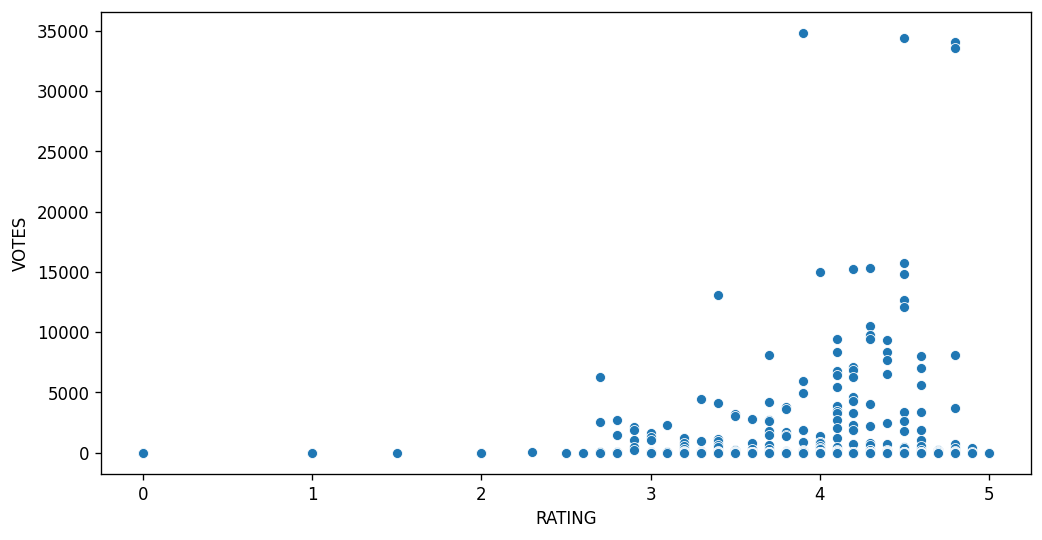

In [5]:
#Task: Explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship bebtween rating and votes. Feel free to edit visual styling to your preference.

plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data=fandango, y='VOTES', x='RATING')

In [6]:
#Task: Calculate the correlation between the columns.
fandango.select_dtypes(include=['number']).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [7]:
#Task: Extract YEAR column. Create a new column that is able to strip the year from the title strings and set this new column as YEAR.
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')', ''))

In [8]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [9]:
#Task: How Many Movies are in the Fandango Dataframe per year?
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

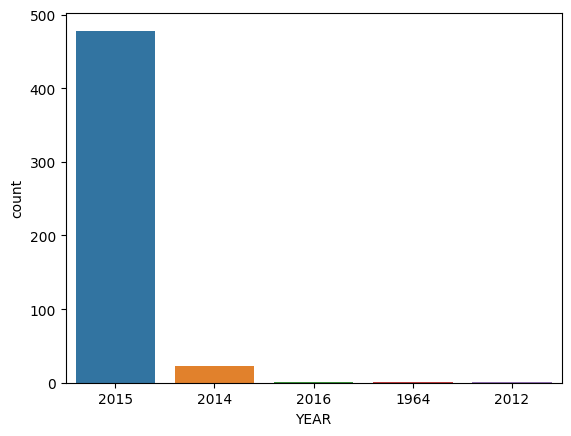

In [10]:
#Task: Visualize the count of movies per year with a plot
sns.countplot(data=fandango,x='YEAR')

In [11]:
#Task: What are the 10 movies with the highest number of votes.
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [12]:
#Task: How many movies have zero votes.
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

In [13]:
#Task: Create A Dataframe of only reviewed films by removing any films that have zero votes.
fan_reviewed = fandango[fandango['VOTES']>0]
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


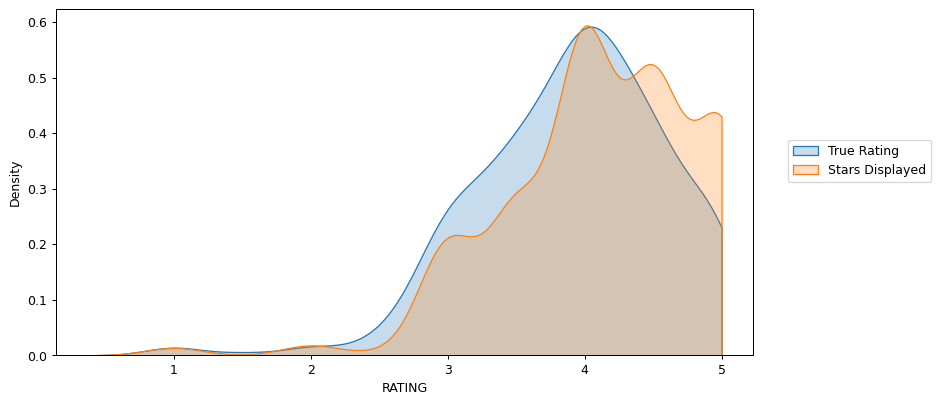

In [14]:
#Task: Create a KDE plot ((or multiple kdeplots)) that displays the distribution of ratings that are displayed(STARS) verus what the true rating was from votes (RATING)

plt.figure(figsize=(10,5), dpi=90)
sns.kdeplot(data=fan_reviewed, x='RATING',clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS',clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05, 0.5))

In [15]:
#Task: Let's now actually quantify this discrepancy. Create a new column of the difference between STARS displayed versus true RATING.
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)
fan_reviewed

C:\Users\Armand S\AppData\Local\Temp\ipykernel_18908\1029190713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\Armand S\AppData\Local\Temp\ipykernel_18908\1029190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

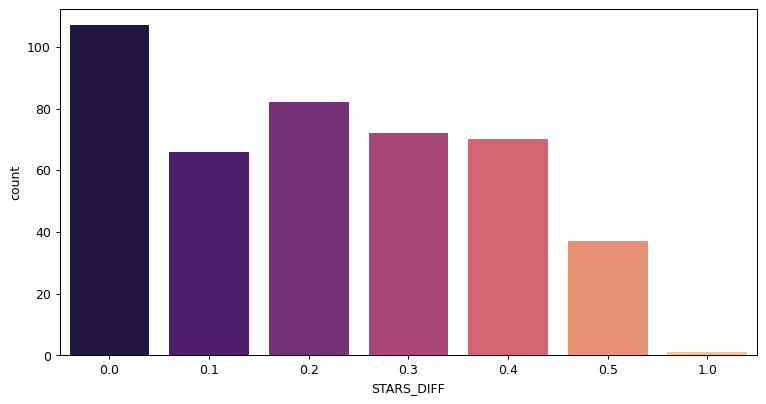

In [16]:
#Task: Create a count plot to display the number of times a certain difference occurs:
plt.figure(figsize=(10,5), dpi=90)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

In [17]:
#Task: We can see from the plot that one movie was displaying over a 1 star difference than its true rating. What movie had this close to 1 star differential?
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [18]:
#Task: Let's now Compare scores from Fandango to other movie sites and see how they compare.
all_sites = pd.read_csv("all_sites_scores.csv")

In [19]:
#explore the all site website.
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [20]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

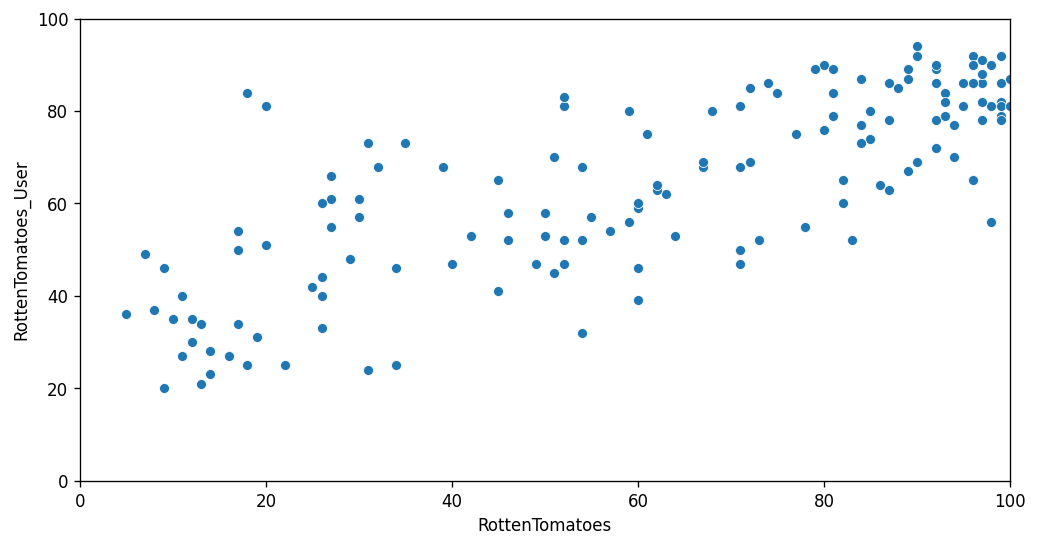

In [21]:
#Task: Create a Scatterplot exploring the relationship between Rotten tomatoes Critic Reviews and RT User reviews. 
plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data=all_sites,x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [22]:
#Task: Let's quantify this difference by comparing the critics ratings and the RT user ratings. We will calculate this using RT - RT user
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

In [23]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [24]:
#Task: Calculate the Mean Absolute Difference Between RT scores and RT User Scores as described above.
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

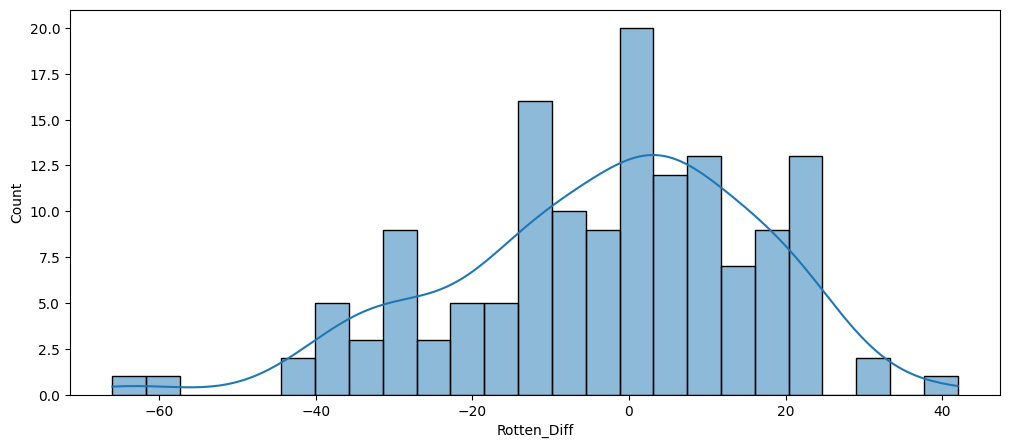

In [25]:
#Task: Plot the distribution of the differences between RT critics minus RT User Score. There should be negative values in the distribution plot.
plt.figure(figsize=(12,5), dpi=100)
sns.histplot(all_sites,x='Rotten_Diff', kde=True, bins=25)


<Axes: xlabel='Rotten_Diff', ylabel='Count'>

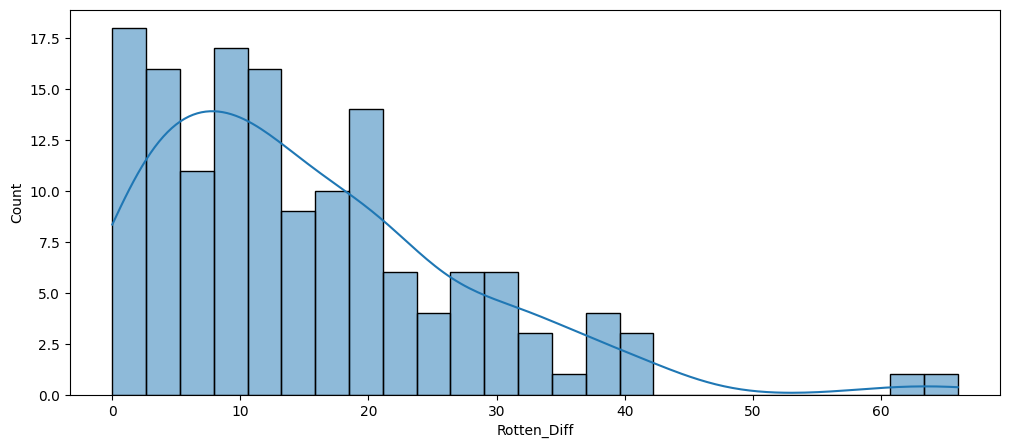

In [26]:
#Task: Plot the Absolute Difference between RT Critics Score and User Score
#the trick is to change X into the mean absolute difference equation code
plt.figure(figsize=(12,5), dpi=100)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

In [27]:
#Task: Find out which movies are causing the largest differences
#What are the top 5 movies users rated higher than critics on average.

all_sites[['FILM', 'Rotten_Diff']].sort_values(by=['Rotten_Diff']).head(5)

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [28]:
#Task: Now show the top 5 movies critics scores higher than users on average.
all_sites.nlargest(5, 'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

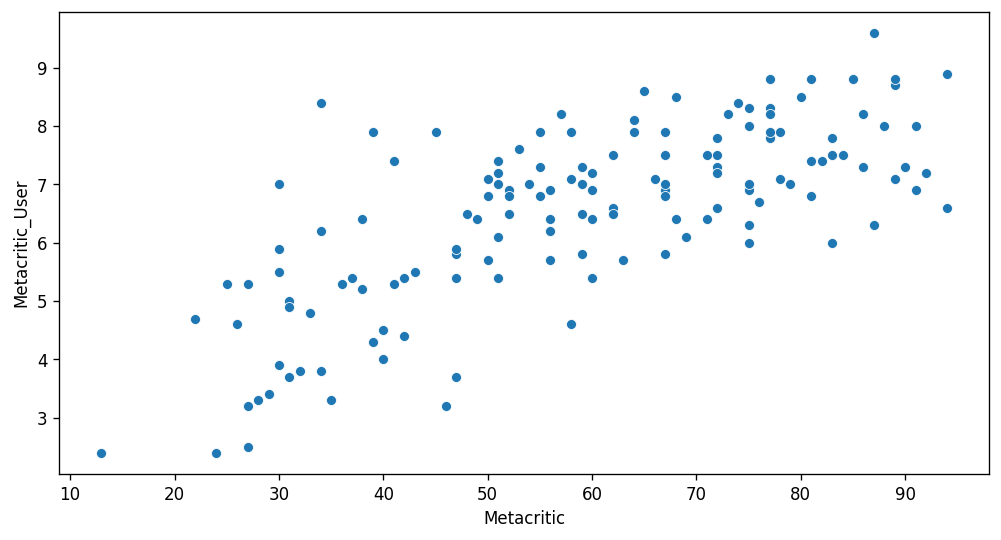

In [29]:
#Task: Now let's take a quick look at MetaCritic. Display a scatterplot of the Metacritic Rating verys the Metacriti User Rating
plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data=all_sites,x='Metacritic', y='Metacritic_User')

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

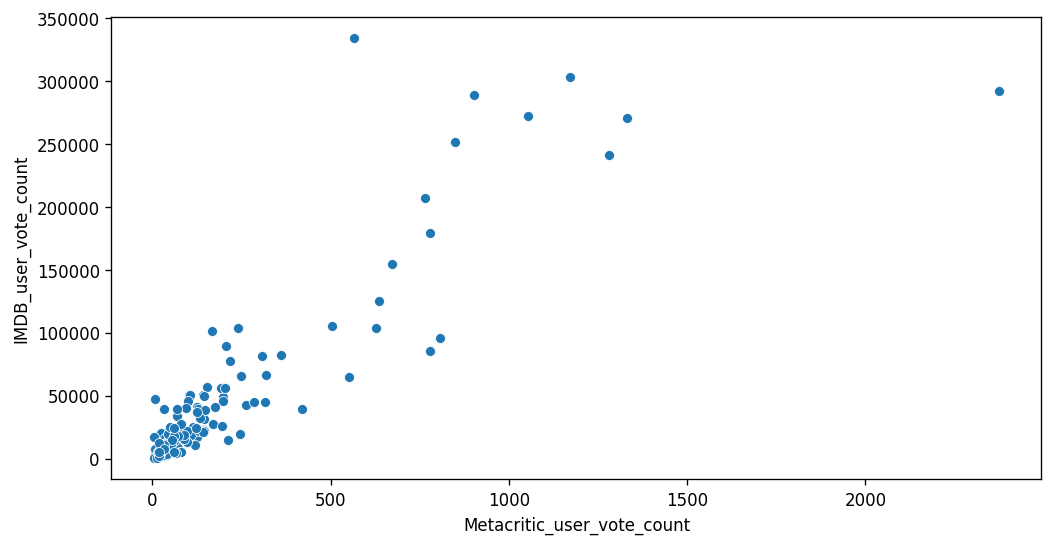

In [30]:
#Task: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.
plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [31]:
#Task: What movie has the highest IMDB user vote count.
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [32]:
#Task: Combine Fandango table with all sites table. Not every movie will be in fandango and all sites data. So do an Inner merge to merge together both Dataframes based on the FILM columns.
df = pd.merge(fandango, all_sites, on ='FILM', how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [33]:
#Task: Normalizze columns to fandango stars and ratings 0-5
#In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same. 100/20 = 5, 10/2 = 5
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1 )

In [34]:
#metacritic normalization
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)

In [35]:
#IMDB normalization
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [36]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [37]:
#Task: create a norm_Scores dataframe that only contains the normalizes ratings. Include both STARS and RATING from the original fandango table
norm_scores = df[['STARS', 'RATING','Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm', 'RT_Norm', 'RTU_Norm']]
norm_scores.head()

,STARS,RATING,Meta_Norm,Meta_U_Norm,IMDB_Norm,RT_Norm,RTU_Norm
0,4.0,3.9,2.3,1.6,2.1,1.2,2.1
1,4.5,4.5,3.0,3.5,3.6,3.6,4.0
2,5.0,4.8,3.6,3.3,3.7,3.6,4.2
3,5.0,4.8,3.4,3.4,3.7,4.0,4.2
4,4.5,4.5,4.7,4.4,4.3,4.9,4.5


C:\Users\Armand S\AppData\Local\Temp\ipykernel_18908\1113835870.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


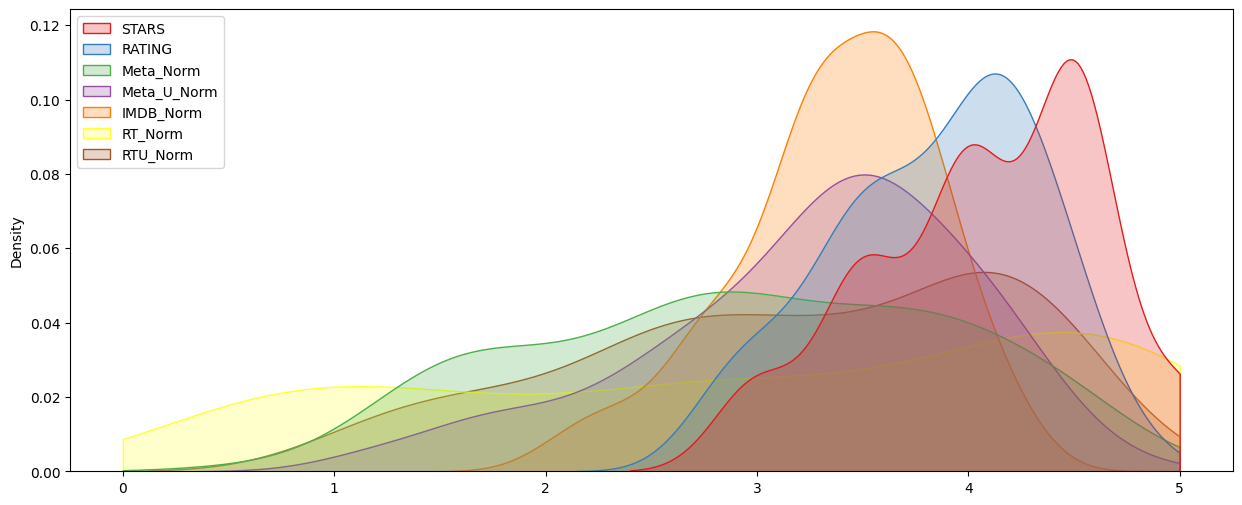

In [38]:
#Task: Comparing Distribution of Scores Across Sites. Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore Seaborn KDEplot docs for some simple ways to quickly show this.
#move legend function to move seaborn legends
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
fig, ax = plt.subplots(figsize=(15,6), dpi=100)
sns.kdeplot(data=norm_scores, clip=[0,5], fill=True, palette='Set1')
#move legend
move_legend(ax, "upper left")

C:\Users\Armand S\AppData\Local\Temp\ipykernel_18908\1113835870.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


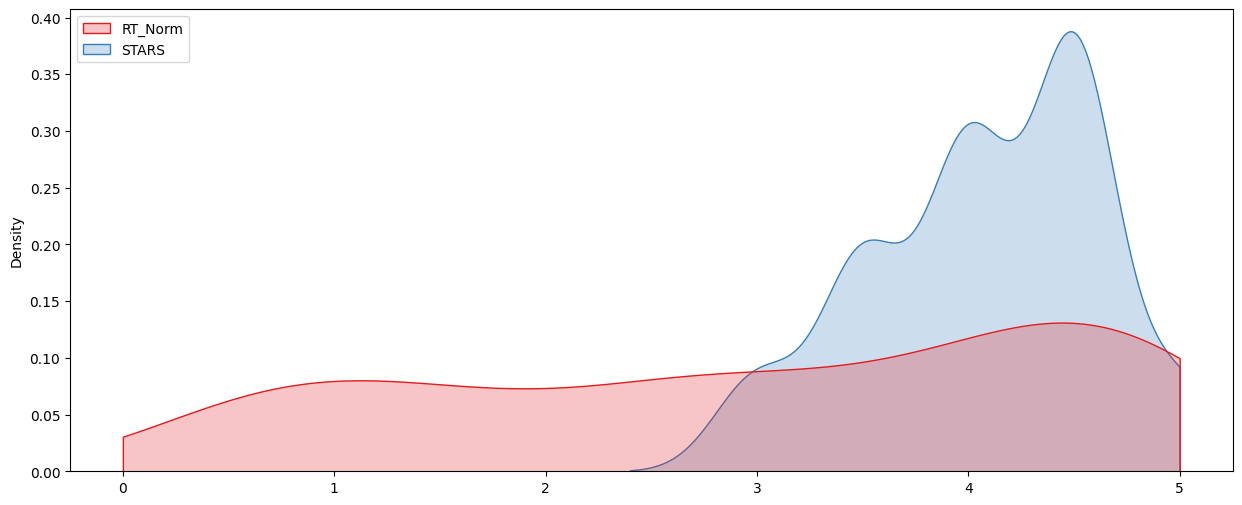

In [39]:
#Create a KDE plot that compares the distribution of RT critic ratings against the STARS displayed by Fandango

fig, ax = plt.subplots(figsize=(15,6), dpi=100)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], fill=True, palette='Set1')

#move legend
move_legend(ax, "upper left")

<Axes: ylabel='Count'>

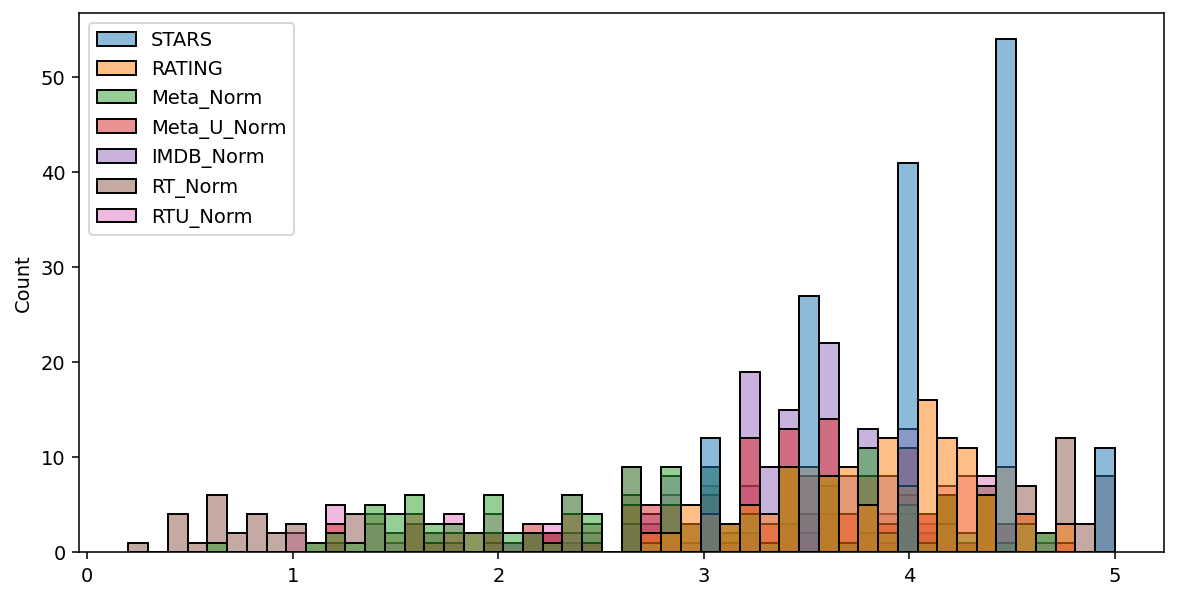

In [40]:
#task create a histogram for all the normalized scores
plt.figure(figsize=(10,5), dpi=140)
sns.histplot(norm_scores, bins=50)

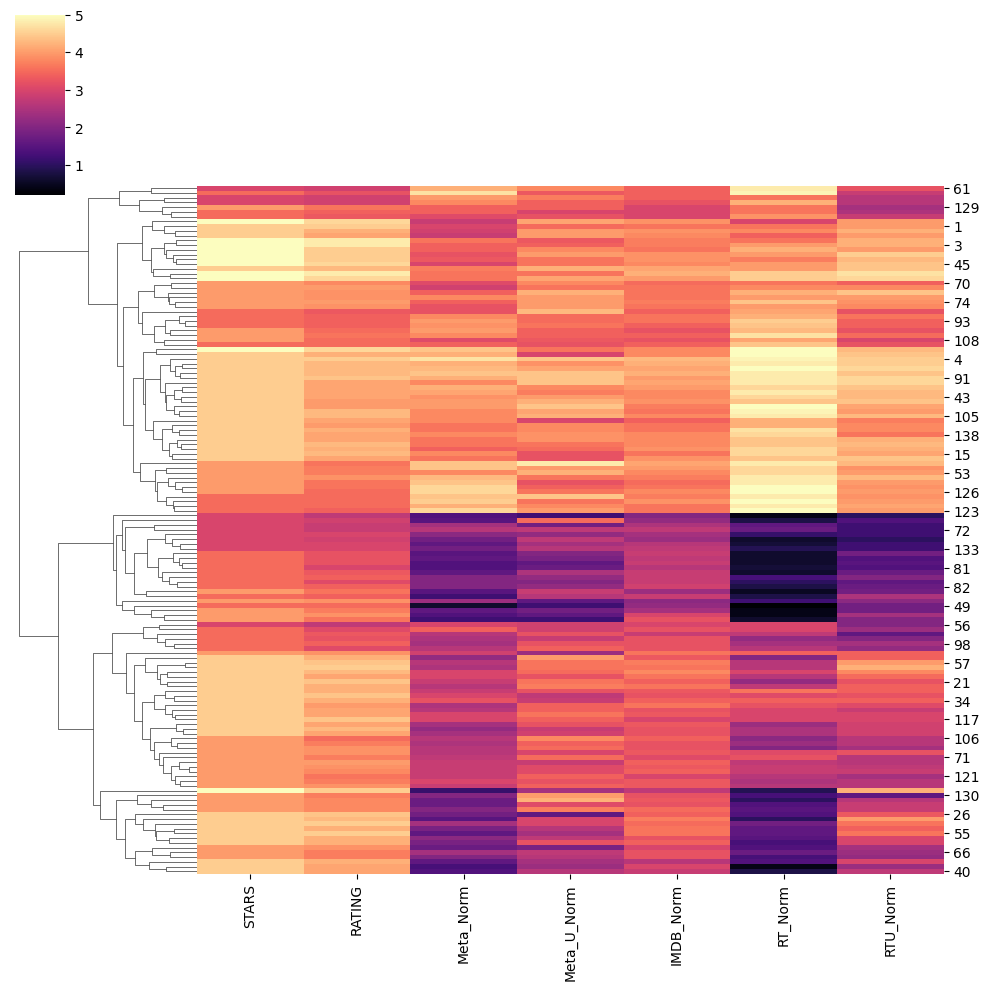

In [41]:
#Create a clustermap visualization of all normalized scores. This clustermap does not need to have the FILM titles as the index, feel free to drop for the clustermap.
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

In [42]:
#Task: Display the top 10 lowest rated movies.
norm_films = df[['FILM','STARS', 'RATING','Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm', 'RT_Norm', 'RTU_Norm']]
worst_films = norm_films.nsmallest(10, 'RT_Norm')
worst_films

,FILM,STARS,RATING,Meta_Norm,Meta_U_Norm,IMDB_Norm,RT_Norm,RTU_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.6,1.2,2.2,0.2,1.8
25,Taken 3 (2015),4.5,4.1,1.3,2.3,3.0,0.4,2.3
28,Fantastic Four (2015),3.0,2.7,1.4,1.2,2.0,0.4,1.0
54,Hot Pursuit (2015),4.0,3.7,1.6,1.8,2.4,0.4,1.8
84,Hitman: Agent 47 (2015),4.0,3.9,1.4,1.6,3.0,0.4,2.4
50,The Boy Next Door (2015),4.0,3.6,1.5,2.8,2.3,0.5,1.8
77,Seventh Son (2015),3.5,3.2,1.5,2.0,2.8,0.6,1.8
78,Mortdecai (2015),3.5,3.2,1.4,1.6,2.8,0.6,1.5
83,Sinister 2 (2015),3.5,3.3,1.6,2.5,2.8,0.6,1.7
87,Unfinished Business (2015),3.5,3.2,1.6,1.9,2.7,0.6,1.4
